In [6]:
pip install --upgrade pip

  Using cached pip-22.3.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.0.1
    Uninstalling pip-21.0.1:
      Successfully uninstalled pip-21.0.1
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install tensorflow

     -------------------------------------- 266.3/266.3 MB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 6.9 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 7.3 MB/s eta 0:00:00
     -------------------------------------- 896.1/896.1 kB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 7.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.Collecting astunparse>=1.6.0



     ---------------------------------------- 6.0/6.0 MB 7.6 MB/s eta 0:00:00
     -------------------------------------- 124.6/124.6 kB 7.6 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 781.3/781.3 kB 7.0 MB/s eta 0:00:00
     -------------------------------------- 175.4/175.4 kB 5.2 MB/s eta 0:00:00
     ---------------------------------------- 93.3/93.3 kB 5.2 MB/s eta 0:00:00
     -------------------------------------- 151.7/151.7 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0


In [49]:
tf.keras.datasets.mnist.load_data(path="mnist.npz")

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [50]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [51]:
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Convolution2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils import plot_model
from keras.regularizers import l1, l2
from keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

import pydotplus
from keras.utils import plot_model
from keras.utils import vis_utils

vis_utils.pydot = pydotplus

In [52]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

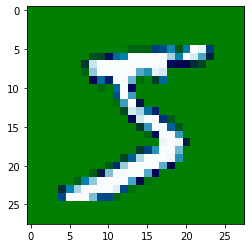

In [53]:
plt.imshow(X_train[0], cmap='ocean');

In [54]:
num_epochs = 50
batch_size=32

In [55]:
result = {}

## Simple Model

In [56]:
model_name = 'Simple Model'

In [57]:
def simple_nn(X_train, y_train):
    X_train = (X_train / 255) - 0.5
    X_train = X_train.reshape((-1, 784))
    
    model = Sequential([
        Dense(64, activation='relu', input_shape=(784,)),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax'),
    ])
    
    model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    )
    
    history = model.fit(
        X_train,
        to_categorical(y_train),
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.25,
        verbose=0
)
    print(f'Best validation accuracy: {max(history.history["val_accuracy"])}')
    print(f'Best validation loss: {min(history.history["val_loss"])}')
    
    return (model, history.history)

In [58]:
model, result[model_name] = simple_nn(X_train, y_train)

Best validation accuracy: 0.972000002861023
Best validation loss: 0.11098798364400864


In [61]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [62]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: graphviz in c:\users\reshe\anaconda3\lib\site-packages (0.20.1)



In [63]:
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Drop out

In [64]:
model_name = 'Drop out'
drop_prob_1 = 0.25
drop_prob_2 = 0.5

In [65]:
def drop_out_model(X_train, y_train):
    X_train = (X_train / 255) - 0.5
    X_train = X_train.reshape((-1, 784))
    
    model = Sequential([
        Dense(64, activation='relu', input_shape=(784,)),
        Dropout(drop_prob_1),
        Dense(64, activation='relu'),
        Dropout(drop_prob_1),
        Dense(10, activation='softmax'),
    ])
    
    model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    )
    
    history = model.fit(
        X_train,
        to_categorical(y_train),
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.25,
        verbose=0
    )
    
    print(f'Best validation accuracy: {max(history.history["val_accuracy"])}')
    print(f'Best validation loss: {min(history.history["val_loss"])}')
    
    return (model, history.history)

In [66]:

model, result[model_name] = drop_out_model(X_train, y_train)

Best validation accuracy: 0.9637333154678345
Best validation loss: 0.12340075522661209


In [67]:
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## L2-regularisation

In [68]:
model_name = 'L2-regularisation'
l2_lambda = 0.0001

In [69]:
def l2_model(X_train, y_train):
    X_train = (X_train / 255) - 0.5
    X_train = X_train.reshape((-1, 784))
    
    model = Sequential([
        Dense(64, activation='relu', input_shape=(784,), kernel_regularizer=l2(l2_lambda)),
        Dense(64, activation='relu', kernel_regularizer=l2(l2_lambda)),
        Dense(10, activation='softmax'),
    ])
    
    model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    )
    
    history = model.fit(
        X_train,
        to_categorical(y_train),
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.25,
        verbose=0
    )
    
    print(f'Best validation accuracy: {max(history.history["val_accuracy"])}')
    print(f'Best validation loss: {min(history.history["val_loss"])}')
    
    return (model, history.history)

In [70]:
model, result[model_name] = l2_model(X_train, y_train)

Best validation accuracy: 0.9714000225067139
Best validation loss: 0.1491408348083496


In [71]:
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Result

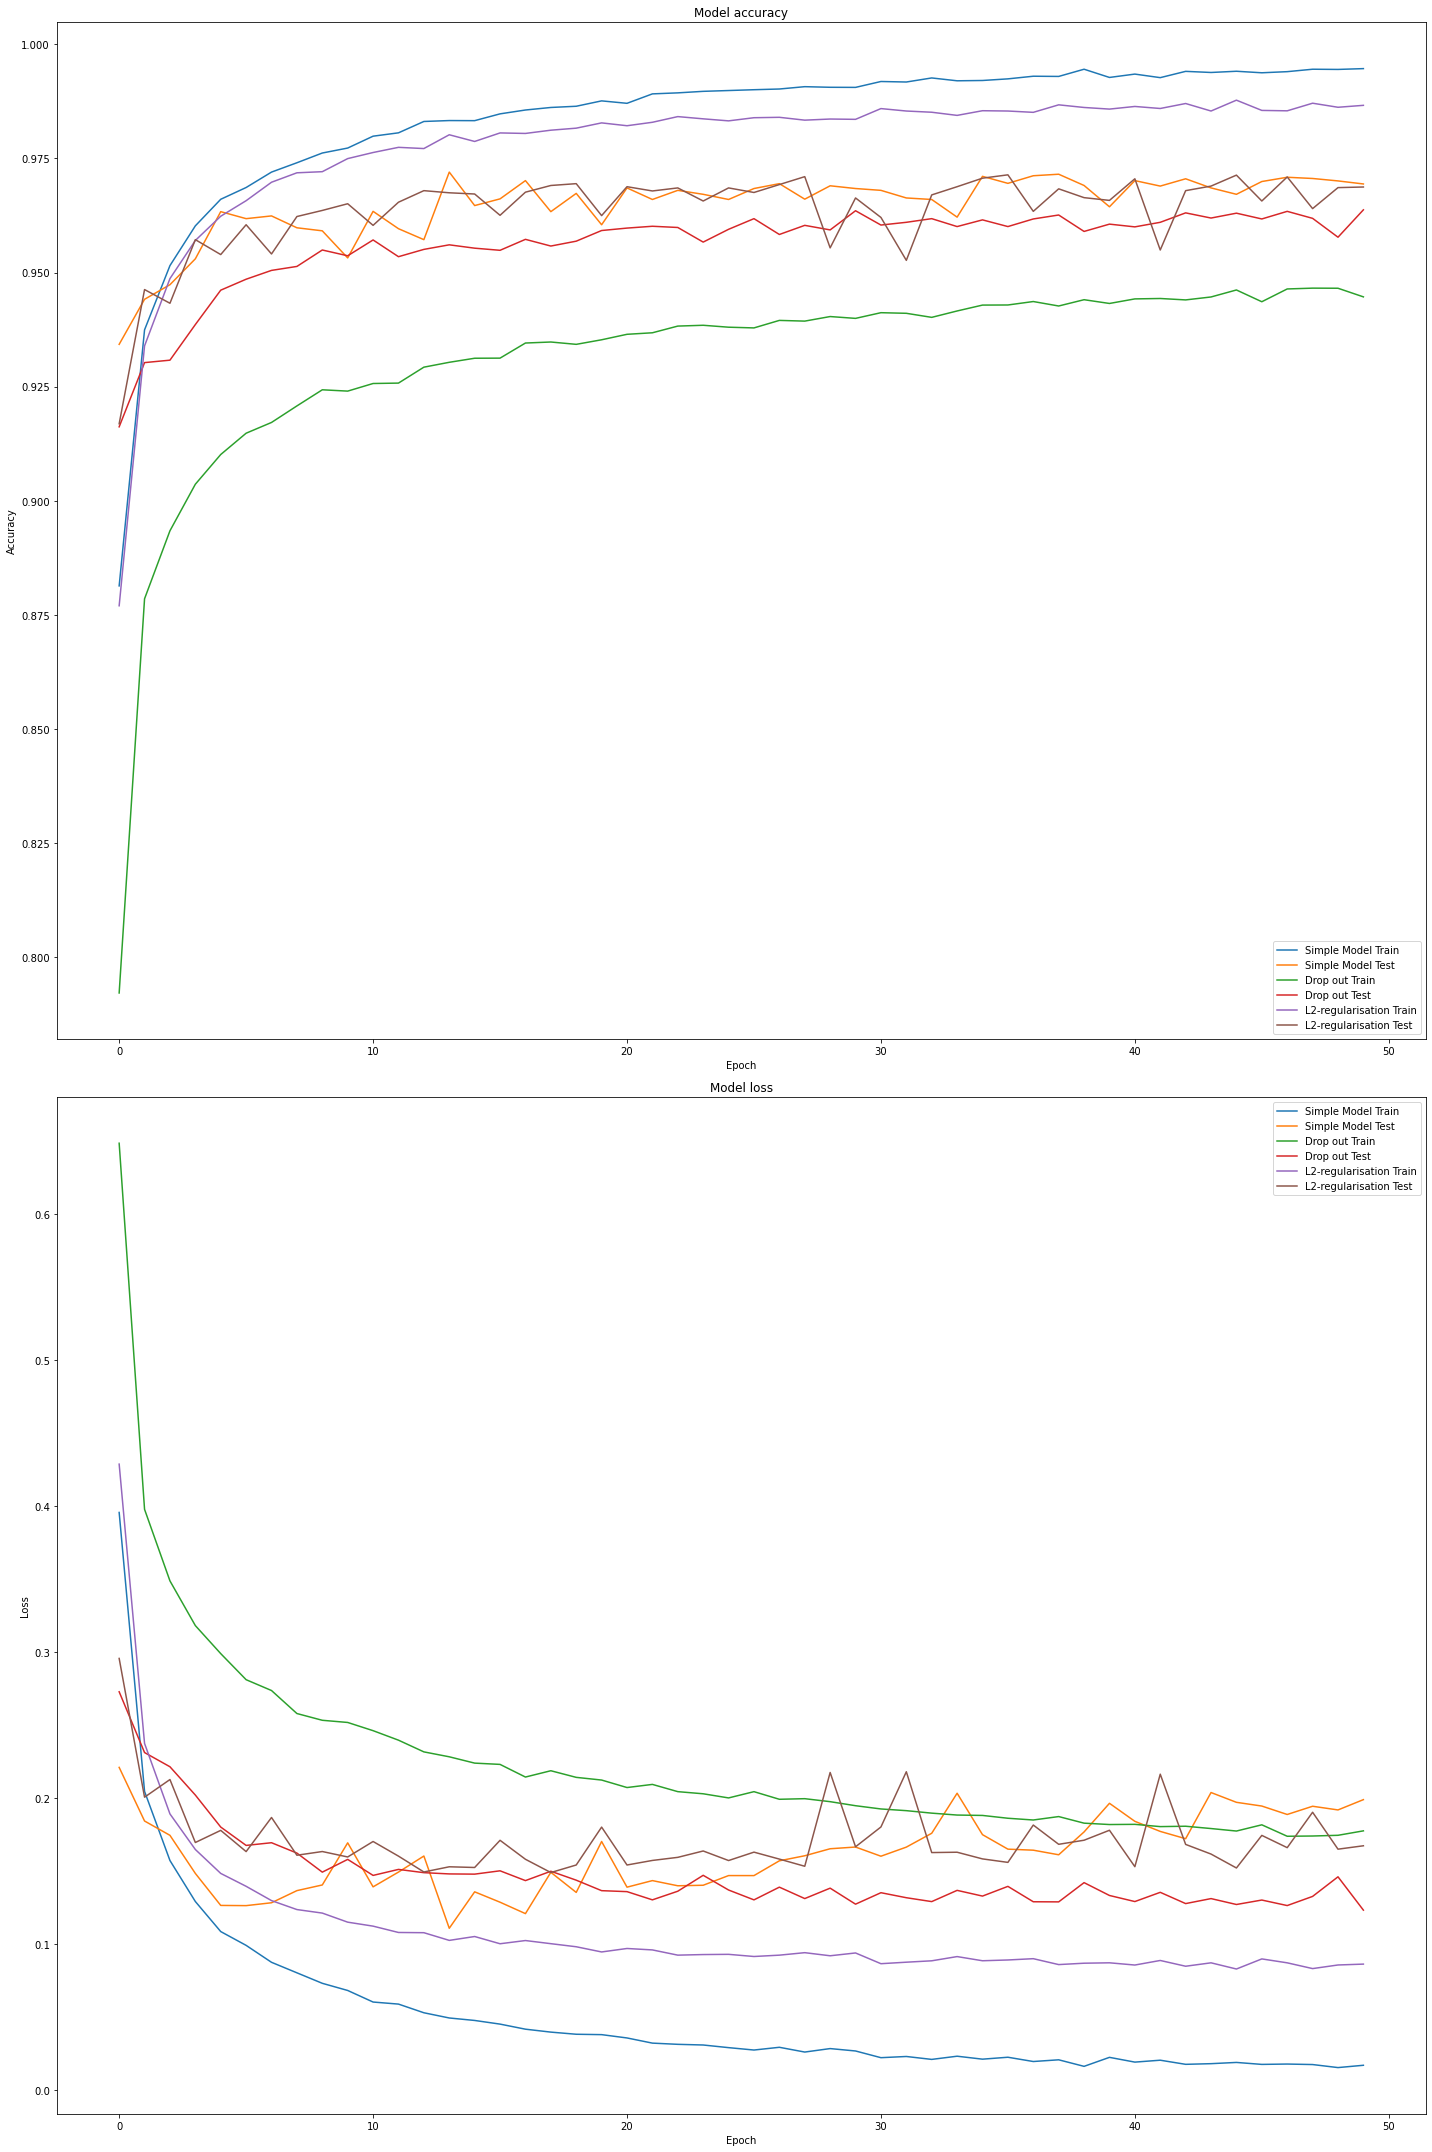

In [75]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_figheight(30)
fig.set_figwidth(20)

ax1.set_title('Model accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')

ax2.set_title('Model loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')


for name, history in result.items():
    ax1.plot(history['accuracy'], label=f'{name} Train')
    ax1.plot(history['val_accuracy'], label=f'{name} Test')
    ax2.plot(history['loss'], label=f'{name} Train')
    ax2.plot(history['val_loss'], label=f'{name} Test')

ax1.legend(loc='lower right')
ax2.legend(loc='upper right')
fig.tight_layout()